# Review an algorithm using jupyter lab

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import os
%matplotlib inline     
sns.set(color_codes=True)

In [6]:
%pwd

'/home/shoff/Projekte/Automatically-Estimating-Task-Durations/Scripts'

In [7]:
df = pd.read_csv("./output/A002_1_swearchiv2020_swearchiv2020.csv")
df.tail(1)

Name  Column  Color  \
1022  IT-Service: Ticketsystem einrichten 28.12.2020...  12.202  White   

      Time spent  DurationInSeconds  EstimateInSeconds  
1022       0.575             2070.0        6585.716129

In [8]:
df.dtypes

Name                  object
Column               float64
Color                 object
Time spent           float64
DurationInSeconds    float64
EstimateInSeconds    float64
dtype: object

In [9]:
df = df.rename(columns={"Color":"TaskType"})
df.shape


(1023, 6)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [11]:
df.count()

Name                 1023
Column               1023
TaskType             1023
Time spent           1023
DurationInSeconds    1023
EstimateInSeconds    1023
dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df.count()

Name                 1023
Column               1023
TaskType             1023
Time spent           1023
DurationInSeconds    1023
EstimateInSeconds    1023
dtype: int64

In [14]:
print(df.isnull().sum())

Name                 0
Column               0
TaskType             0
Time spent           0
DurationInSeconds    0
EstimateInSeconds    0
dtype: int64


In [15]:
df.dropna()
df.count()

Name                 1023
Column               1023
TaskType             1023
Time spent           1023
DurationInSeconds    1023
EstimateInSeconds    1023
dtype: int64

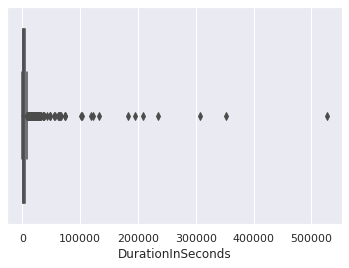

In [16]:
sns.boxplot(x=df["DurationInSeconds"])

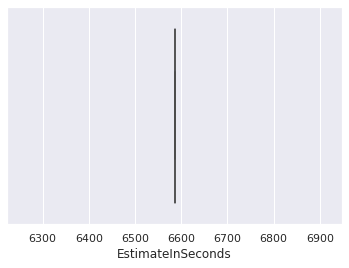

In [17]:
sns.boxplot(x=df["EstimateInSeconds"])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Column                  3.0000
Time spent              0.8935
DurationInSeconds    3216.6000
EstimateInSeconds       0.0000
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/tmp/ipykernel_8357/4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(887, 6)

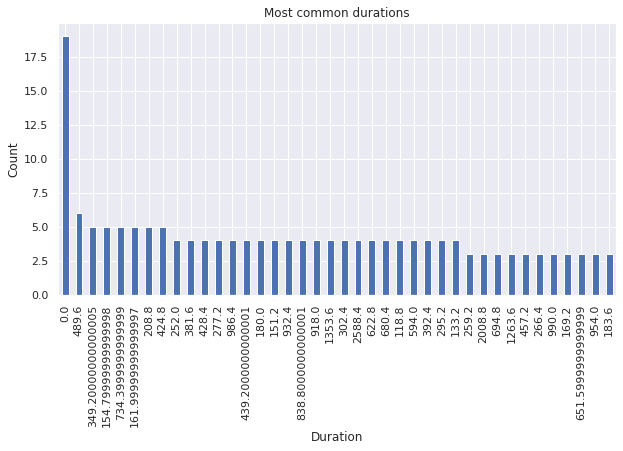

In [20]:
df.DurationInSeconds.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Most common durations")
plt.ylabel('Count')
plt.xlabel('Duration');

Column  Time spent  DurationInSeconds  EstimateInSeconds
Column             1.000000   -0.059331          -0.059331                NaN
Time spent        -0.059331    1.000000           1.000000                NaN
DurationInSeconds -0.059331    1.000000           1.000000                NaN
EstimateInSeconds       NaN         NaN                NaN                NaN

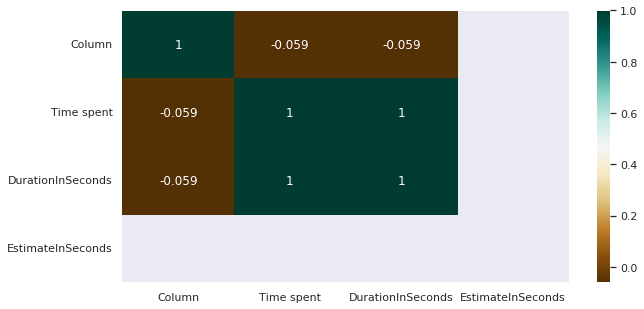

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

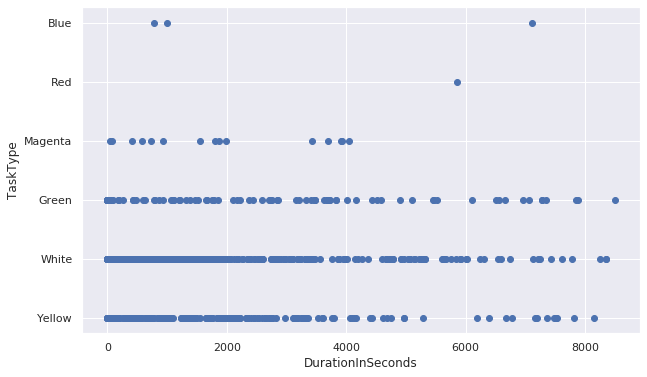

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['DurationInSeconds'], df['TaskType'])
ax.set_xlabel('DurationInSeconds')
ax.set_ylabel('TaskType')
plt.show()

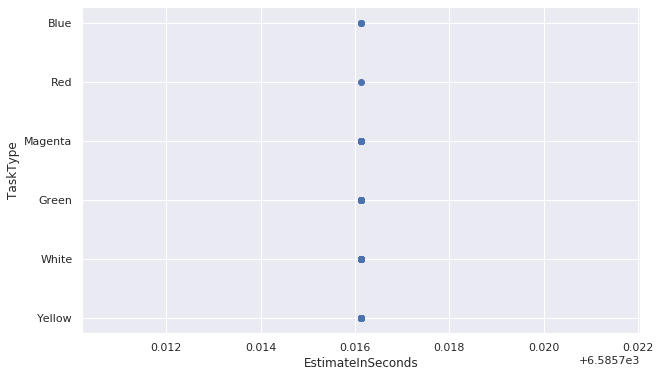

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['EstimateInSeconds'], df['TaskType'])
ax.set_xlabel('EstimateInSeconds')
ax.set_ylabel('TaskType')
plt.show()

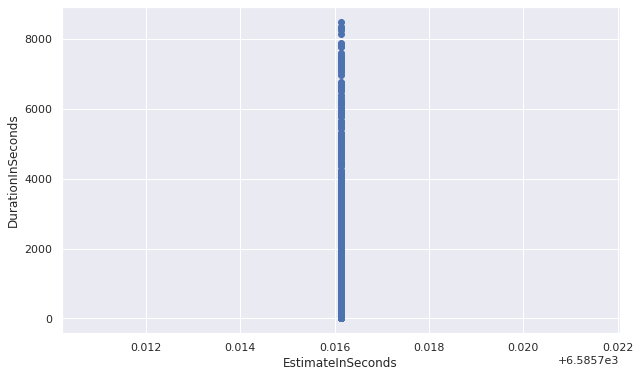

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['EstimateInSeconds'], df['DurationInSeconds'])
ax.set_xlabel('EstimateInSeconds')
ax.set_ylabel('DurationInSeconds')
plt.show()